# Importing Stuff

In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))


# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'a2rData_v2.csv')
df = pd.read_csv(data_file_path)

#df['Targ'] = df['MAR'] > 3.5
#data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'Targ', 'OAR', 'patient', 'MAR']]
df['Targ'] = df['neutrophil']<1.5

data_dates = df[['treatment_date','first_treatment_date']]
data = df.drop(columns=['treatment_date','first_treatment_date'])
#data = df
print(data)

          mrn                 regimen  height  weight  body_surface_area  \
0       25227         GI-GEM+ABRAXANE     154    63.3              1.612   
1       25227         GI-GEM+ABRAXANE     154    63.3              1.612   
2       25227         GI-GEM+ABRAXANE     154    63.3              1.612   
3       25227         GI-GEM+ABRAXANE     154    64.0              1.620   
4       25227         GI-GEM+ABRAXANE     154    64.0              1.620   
...       ...                     ...     ...     ...                ...   
3995  2668948  GI-CISPCAPE+TRAS(MAIN)     177    81.3              1.943   
3996  2668948  GI-CISPCAPE+TRAS(LOAD)     177    81.6              1.988   
3997  2668948  GI-CISPCAPE+TRAS(MAIN)     177    81.0              1.988   
3998  2668948  GI-CISPCAPE+TRAS(MAIN)     177    83.6              1.988   
3999  2668948    GI-RAMUCIRUMAB+PACLI     177    82.2              2.010   

      cycle_number       intent  age  esas_pain  esas_tiredness  ...  \
0              

# Run Analysis witout a config file

In [3]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_output')

analyzer.run()

Config file not found, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['Targ', 'intent', 'gender', 'regimen', 'disease_site', 'height', 'cycle_number', 'esas_nausea', 'bicarbonate', 'esas_tiredness', 'esas_anxiety', 'chloride', 'esas_drowsiness', 'esas_pain', 'age', 'esas_shortness_of_breath', 'patient_ecog', 'esas_depression', 'albumin', 'potassium', 'esas_appetite', 'esas_well_being', 'sodium']

Continuous: ['red_blood_cell', 'neutrophil', 'lymphocyte', 'alkaline_phosphatase', 'total_bilirubin', 'monocyte', 'creatinine', 'eosinophil', 'mrn', 'body_surface_area', 'platelet', 'alanine_aminotransferase', 'mean_corpuscular_volume', 'mean_platelet_volume', 'hematocrit', 'white_blood_cell', 'lactate_dehydrogenase', 'magnesium', 'aspartate_aminotransferase', 'weight', 'phosphate', 'glucose', 'mean_corpuscular_hemoglobin', 'mean_corpuscular_hemoglobin_concentration', 'hemoglobin', 'red_cell_distribution_width']

Config file not found, checking for 

# Run with edited config.yaml

Here I moved patient from categorical to other

In [4]:
import yaml
import pprint 

pp = pprint.PrettyPrinter(indent=4)

with open('analysis_output/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print('\nGENERATED CONFIG:\n')
pp.pprint(config)

#config['columns']['categorical'].remove('patient')
#config['mapping'].pop('patient')
#config['missingness_strategy']['categorical'].pop('patient')
#config['columns']['other'].append('patient')
#config['columns']['continuous'].remove('mrn')
#config['mapping'].pop('PatientID')
#config['missingness_strategy']['categorical'].pop('PatientID')
#config['columns']['other'].append('PatientID')

print('\nUPDATED CONFIG:\n')
pp.pprint(config)

if not os.path.exists('./analysis_updated'):
    os.mkdir('./analysis_updated')
with open('analysis_updated/config.yaml', 'w') as f:
    yaml.dump(config, f)


GENERATED CONFIG:

{   'columns': {   'categorical': [   'Targ',
                                      'disease_site',
                                      'regimen',
                                      'intent',
                                      'gender'],
                   'continuous': [   'glucose',
                                     'neutrophil',
                                     'lactate_dehydrogenase',
                                     'hemoglobin',
                                     'mean_platelet_volume',
                                     'lymphocyte',
                                     'total_bilirubin',
                                     'mean_corpuscular_hemoglobin',
                                     'creatinine',
                                     'red_blood_cell',
                                     'body_surface_area',
                                     'platelet',
                                     'alanine_aminotransferase',
        

In [5]:
import yaml
from AutoML.features.engineering import feature_engineering_clinical

with open('analysis_updated/config_others.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

data = pd.concat([data, data_dates], axis=1)

data = feature_engineering_clinical(data, cfg)

#data.to_csv('analysis_updated/test_data.csv')
data = data.drop(columns=['treatment_date','first_treatment_date'])

print(data)

          mrn                 regimen  height  weight  body_surface_area  \
0       25227         GI-GEM+ABRAXANE     154    63.3              1.612   
1       25227         GI-GEM+ABRAXANE     154    63.3              1.612   
2       25227         GI-GEM+ABRAXANE     154    63.3              1.612   
3       25227         GI-GEM+ABRAXANE     154    64.0              1.620   
4       25227         GI-GEM+ABRAXANE     154    64.0              1.620   
...       ...                     ...     ...     ...                ...   
3995  2668948  GI-CISPCAPE+TRAS(MAIN)     177    81.3              1.943   
3996  2668948                   Other     177    81.6              1.988   
3997  2668948  GI-CISPCAPE+TRAS(MAIN)     177    81.0              1.988   
3998  2668948  GI-CISPCAPE+TRAS(MAIN)     177    83.6              1.988   
3999  2668948    GI-RAMUCIRUMAB+PACLI     177    82.2              2.010   

      cycle_number       intent  age esas_pain esas_tiredness  ...  \
0                

In [6]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_updated', config_file='./analysis_updated/config.yaml')

analyzer.run()

Applying changes from config file...

╒══════════════════════════════════════════════════════╤════════════════════════╤═══════════╤══════════════╕
│                                                      │                        │ Missing   │ Overall      │
╞══════════════════════════════════════════════════════╪════════════════════════╪═══════════╪══════════════╡
│ n                                                    │                        │           │ 4000         │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼──────────────┤
│ glucose, mean (SD)                                   │                        │ 0         │ 6.9 (1.8)    │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼──────────────┤
│ neutrophil, mean (SD)                                │                        │ 0         │ 3.2 (1.8)    │
├──────────────────────────────────────────────────────┼────────────────────────┼─────────

# Run trainer

No path specified. Models will be saved in: "AutogluonModels\ag-20240920_001956"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
Memory Avail:       4.28 GB / 15.70 GB (27.3%)
Disk Space Avail:   367.77 GB / 953.12 GB (38.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prot


Model Leaderbord
----------------
╒════╤═════════════════════╤═════════════╤═══════════════╕
│    │ model               │   score_val │ eval_metric   │
╞════╪═════════════════════╪═════════════╪═══════════════╡
│  0 │ WeightedEnsemble_L2 │    0.993045 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  1 │ LightGBM            │    0.990556 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  2 │ CatBoost            │    0.988286 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  3 │ LightGBMLarge       │    0.988213 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  4 │ XGBoost             │    0.982649 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  5 │ NeuralNetFastAI     │    0.980526 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  6 │ LightGBMXT          │    0.973058 │ roc_auc       │
├────┼───────────────

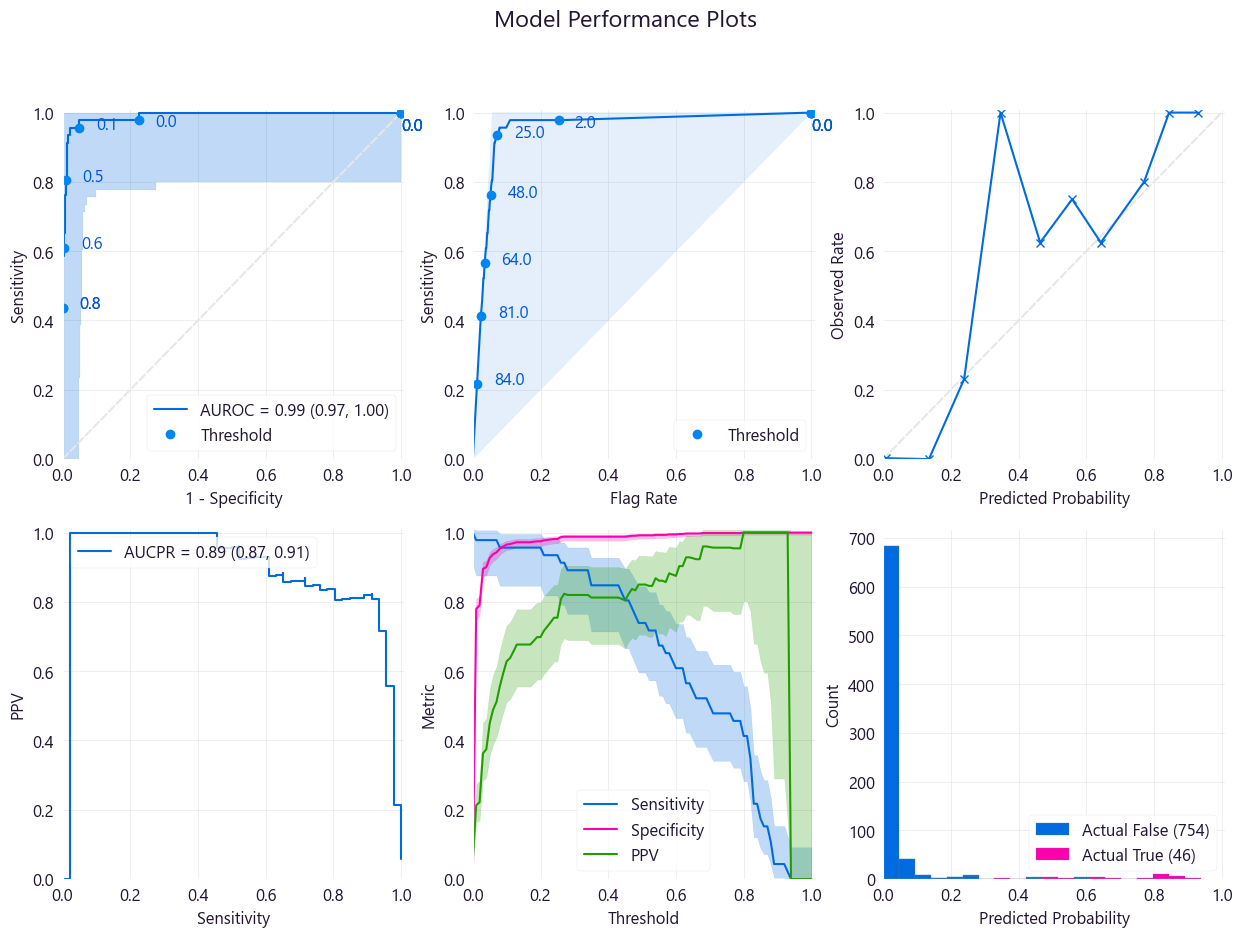

Computing feature importance via permutation shuffling for 51 features using 800 rows with 5 shuffle sets...
	23.14s	= Expected runtime (4.63s per shuffle set)


Error in plotting diagnostics: 'Figure' object has no attribute 'data'


	6.07s	= Actual runtime (Completed 5 of 5 shuffle sets)


  0%|          | 0/800 [00:00<?, ?it/s]

In [7]:
from AutoML.trainer import AutoMLSupervised

df = pd.read_csv('analysis_updated/updated_data.csv')
trainer = AutoMLSupervised(task='binary') #reduction_method='mrmr'
#trainer.run(data, 'Targ', exclude=['OAR', 'patient', 'MAR'], stratify_on='OAR')
trainer.run(data, 'Targ', exclude=['mrn','neutrophil'])